In [1]:
import pandas as pd

# Load the CSV file
file_path = "./Final Results Extended big.csv"
df = pd.read_csv(file_path)
df.head()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_31772\4284841679.py:5: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Time_Now,Blanking_Util,Blanking_SKU1_Queue,Blanking_SKU2_Queue,Blanking_SKU3_Queue,Blanking_SKU4_Queue,Press1_Util,Press2_Util,Press3_Util,Press4_Util,...,SKU3_NVA_Time,SKU3_Transport_Time,SKU3_Wait_Time,SKU3_Other_Time,SKU4_VA_Time,SKU4_NVA_Time,SKU4_Transport_Time,SKU4_Wait_Time,SKU4_Other_Time,Blanking_Queue
0,24,0.846367,0.045715,0.056373,0.055737,0.035849,0.410297,0.434561,0.481388,0.399992,...,0.0,0.537617,0.453650,0.0,1.523338,0.0,0.536243,0.473453,0.0,58.361452
1,24,0.851097,0.051937,0.052934,0.038512,0.042248,0.455471,0.454445,0.387975,0.442986,...,0.0,0.536764,0.473677,0.0,1.523344,0.0,0.534992,0.464380,0.0,62.830599
2,24,0.846115,0.052210,0.047499,0.043181,0.040979,0.496717,0.450816,0.417308,0.352829,...,0.0,0.535925,0.424090,0.0,1.523403,0.0,0.535077,0.475330,0.0,59.365867
3,24,0.841306,0.051769,0.035436,0.046788,0.052362,0.433749,0.363004,0.443909,0.456036,...,0.0,0.535232,0.430992,0.0,1.523381,0.0,0.533233,0.463801,0.0,56.698528
4,24,0.859599,0.045874,0.046802,0.044507,0.057210,0.418329,0.396826,0.499273,0.472454,...,0.0,0.538142,0.502614,0.0,1.523363,0.0,0.537223,0.449320,0.0,65.784631


In [2]:
# =========================
# 1. 상수컬럼 및 전부 0인 컬럼 제거
# =========================

# (1) 상수컬럼: 데이터가 모두 같은 값인 컬럼
const_cols = [col for col in df.columns if df[col].nunique() == 1]

# (2) 전부 0인 컬럼
zero_cols = [col for col in df.columns if (df[col] == 0).all()]

# 합치기 (중복 제거)
drop_cols = list(set(const_cols + zero_cols))

print(f"🗑 제거 대상 컬럼 수: {len(drop_cols)}개")
print(drop_cols)

# 실제 제거
df = df.drop(columns=drop_cols)

print(f"✅ 제거 후 컬럼 수: {df.shape[1]}")

🗑 제거 대상 컬럼 수: 15개
['SKU3_Other_Time', 'SKU2_Other_Time', 'Cell2_Queue', 'Cell4_Queue', 'Time_Now', 'SKU2_NVA_Time', 'c_Cell3__SKU1', 'Cell3_Queue', 'SKU1_NVA_Time', 'Cell1_Queue', 'SKU3_NVA_Time', 'SKU4_Other_Time', 'SKU4_NVA_Time', 'SKU1_Other_Time', 'c_Cell2__SKU3']
✅ 제거 후 컬럼 수: 63


In [3]:
# =========================
# 2. 결측치 확인
# =========================
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

if missing_summary.empty:
    print("✅ 결측치 없음")
else:
    print("⚠️ 결측치 요약:")
    print(missing_summary)

⚠️ 결측치 요약:
SKU1_Transport_Time    1
SKU1_Wait_Time         2
SKU2_VA_Time           2
SKU2_Transport_Time    2
SKU2_Wait_Time         2
SKU3_VA_Time           2
SKU3_Transport_Time    2
SKU3_Wait_Time         2
SKU4_VA_Time           2
SKU4_Transport_Time    3
SKU4_Wait_Time         3
Blanking_Queue         3
dtype: int64


In [4]:
# =========================
# 3. 결측치 제거
# =========================
if not missing_summary.empty:
    before = df.shape[0]
    df = df.dropna()  # 결측치가 하나라도 있는 행 제거
    after = df.shape[0]
    print(f"✅ 결측치가 있는 행 {before - after}개 제거 완료 (남은 행: {after})")

print()
missing_summary2 = df.isnull().sum()
missing_summary2 = missing_summary2[missing_summary2 > 0]
print(missing_summary2)

✅ 결측치가 있는 행 3개 제거 완료 (남은 행: 730493)

Series([], dtype: int64)


In [5]:
# =========================
# 1) Warehouse Queue 컬럼 찾기
# =========================
warehouse_cols = [c for c in df.columns if "warehouse" in c.lower() and "queue" in c.lower()]
print("Warehouse Queue cols:", warehouse_cols)

# =========================
# 2) Warehouse 번호 → Cell 번호로 변환
# =========================
rename_map = {}
for w in warehouse_cols:
    # 숫자 추출 (예: Warehouse1_Queue → 1)
    num = ''.join(filter(str.isdigit, w))
    if num:
        new_name = f"Cell{num}_Queue"
        rename_map[w] = new_name

# =========================
# 3) 컬럼명 변경
# =========================
df = df.rename(columns=rename_map)

print("✅ 이름 변경 매핑:", rename_map)
print("변경 후 Queue 관련 컬럼:", [c for c in df.columns if "queue" in c.lower()])

Warehouse Queue cols: ['Warehouse1_Queue', 'Warehouse_2_Queue', 'Warehouse_3_Queue', 'Warehouse_4_Queue']
✅ 이름 변경 매핑: {'Warehouse1_Queue': 'Cell1_Queue', 'Warehouse_2_Queue': 'Cell2_Queue', 'Warehouse_3_Queue': 'Cell3_Queue', 'Warehouse_4_Queue': 'Cell4_Queue'}
변경 후 Queue 관련 컬럼: ['Blanking_SKU1_Queue', 'Blanking_SKU2_Queue', 'Blanking_SKU3_Queue', 'Blanking_SKU4_Queue', 'Press1_Queue', 'Press2_Queue', 'Press3_Queue', 'Press4_Queue', 'Cell1_Queue', 'Cell2_Queue', 'Cell3_Queue', 'Cell4_Queue', 'Paint1_Queue', 'Paint2_Queue', 'Quality_Queue', 'Forklift_Blanking_Queue', 'Forklift_Press_Queue', 'Forklift_Assembly_Queue', 'Blanking_Queue']


In [7]:
# =========================
# 1) Queue 컬럼 찾기 (대소문자 무시)
# =========================
queue_cols = [c for c in df.columns if "queue" in c.lower()]

# Queue 컬럼들을 전부 숫자형으로 변환 (변환 안 되는 건 NaN 처리)
df[queue_cols] = df[queue_cols].apply(pd.to_numeric, errors="coerce")

print(f"Queue 관련 컬럼 수: {len(queue_cols)}")
print(queue_cols[:10])  # 앞 10개만 확인

# =========================
# 2) 병목 공정 컬럼 생성
# =========================
df["Bottleneck_actual"] = df[queue_cols].idxmax(axis=1)
df["Bottleneck_val"] = df[queue_cols].max(axis=1)

# =========================
# 3) 결과 확인
# =========================
print(df[["Bottleneck_actual", "Bottleneck_val"]].tail())

Queue 관련 컬럼 수: 19
['Blanking_SKU1_Queue', 'Blanking_SKU2_Queue', 'Blanking_SKU3_Queue', 'Blanking_SKU4_Queue', 'Press1_Queue', 'Press2_Queue', 'Press3_Queue', 'Press4_Queue', 'Cell1_Queue', 'Cell2_Queue']
              Bottleneck_actual  Bottleneck_val
730491              Cell1_Queue      351.987571
730492  Forklift_Blanking_Queue      159.652449
730493  Forklift_Blanking_Queue      149.186449
730494  Forklift_Blanking_Queue      144.347610
730495  Forklift_Blanking_Queue      142.087445


In [8]:
# Bottleneck 컬럼의 빈도 계산
bottleneck_counts = df["Bottleneck_actual"].value_counts().head(10)

bottleneck_counts

Bottleneck_actual
Forklift_Blanking_Queue    362514
Cell1_Queue                361290
Cell3_Queue                  6424
Cell4_Queue                   128
Forklift_Assembly_Queue        43
Press2_Queue                   38
Forklift_Press_Queue           30
Press4_Queue                   26
Name: count, dtype: int64

In [9]:
# ================================
# 11. 공정별 실제 병목 레이블 & 값 생성
# ================================
stage_groups = {
    "Blanking": ["Blanking_SKU1_Queue", "Blanking_SKU2_Queue",
                 "Blanking_SKU3_Queue", "Blanking_SKU4_Queue"],
    "Press":    ["Press1_Queue", "Press2_Queue", "Press3_Queue", "Press4_Queue"],
    "Cell":     ["Cell1_Queue", "Cell2_Queue", "Cell3_Queue", "Cell4_Queue"]
}

for stage, cols in stage_groups.items():
    # 병목 컬럼명 (어느 라인/설비가 병목인지)
    df[f"Bottleneck_actual_{stage}"] = df[cols].idxmax(axis=1)
    # 병목 값 (queue 크기)
    df[f"Bottleneck_val_{stage}"] = df[cols].max(axis=1)

# ================================
# 12. 결과 확인
# ================================
check_cols = [c for c in df.columns if c.startswith("Bottleneck_")]
print(df[check_cols].head())

         Bottleneck_actual  Bottleneck_val Bottleneck_actual_Blanking  \
0  Forklift_Blanking_Queue      157.256741        Blanking_SKU2_Queue   
1  Forklift_Blanking_Queue      166.488725        Blanking_SKU2_Queue   
2              Cell1_Queue      335.401556        Blanking_SKU1_Queue   
3  Forklift_Blanking_Queue      147.448407        Blanking_SKU4_Queue   
4  Forklift_Blanking_Queue      150.397600        Blanking_SKU4_Queue   

   Bottleneck_val_Blanking Bottleneck_actual_Press  Bottleneck_val_Press  \
0                 0.056373            Press2_Queue             65.273786   
1                 0.052934            Press1_Queue             74.772823   
2                 0.052210            Press2_Queue             72.901066   
3                 0.052362            Press1_Queue             65.091192   
4                 0.057210            Press1_Queue             65.075312   

  Bottleneck_actual_Cell  Bottleneck_val_Cell  
0            Cell1_Queue            98.155568  
1       

In [10]:
# ================================
# 13. 병목 빈도수 & 비율 확인
# ================================
for stage in stage_groups.keys():
    col = f"Bottleneck_actual_{stage}"
    print(f"\n[ {stage} 병목 빈도수 / 비율 ]")
    
    # 빈도수
    counts = df[col].value_counts()
    print("빈도수:\n", counts)
    
    # 비율 (%)
    ratios = df[col].value_counts(normalize=True) * 100
    print("비율(%):\n", ratios.round(2))


[ Blanking 병목 빈도수 / 비율 ]
빈도수:
 Bottleneck_actual_Blanking
Blanking_SKU1_Queue    183270
Blanking_SKU3_Queue    182790
Blanking_SKU2_Queue    182225
Blanking_SKU4_Queue    182208
Name: count, dtype: int64
비율(%):
 Bottleneck_actual_Blanking
Blanking_SKU1_Queue    25.09
Blanking_SKU3_Queue    25.02
Blanking_SKU2_Queue    24.95
Blanking_SKU4_Queue    24.94
Name: proportion, dtype: float64

[ Press 병목 빈도수 / 비율 ]
빈도수:
 Bottleneck_actual_Press
Press1_Queue    370161
Press2_Queue    192794
Press3_Queue     91451
Press4_Queue     76087
Name: count, dtype: int64
비율(%):
 Bottleneck_actual_Press
Press1_Queue    50.67
Press2_Queue    26.39
Press3_Queue    12.52
Press4_Queue    10.42
Name: proportion, dtype: float64

[ Cell 병목 빈도수 / 비율 ]
빈도수:
 Bottleneck_actual_Cell
Cell1_Queue    654376
Cell3_Queue     61488
Cell4_Queue     10386
Cell2_Queue      4243
Name: count, dtype: int64
비율(%):
 Bottleneck_actual_Cell
Cell1_Queue    89.58
Cell3_Queue     8.42
Cell4_Queue     1.42
Cell2_Queue     0.58
Name: p

In [11]:
# =========================
# 컬럼명 정규화: 언더스코어 여러 개 → 1개로 통일
# =========================
df.columns = df.columns.str.replace(r"__+", "_", regex=True)

# 확인
for sku in ["SKU1","SKU2","SKU3","SKU4"]:
    related_cols = [c for c in df.columns if f"Cell" in c and sku in c]
    print(sku, related_cols)

SKU1 ['c_Cell1_SKU1', 'c_Cell2_SKU1', 'c_Cell4_SKU1']
SKU2 ['c_Cell1_SKU2', 'c_Cell2_SKU2', 'c_Cell3_SKU2', 'c_Cell4_SKU2']
SKU3 ['c_Cell1_SKU3', 'c_Cell3_SKU3', 'c_Cell4_SKU3']
SKU4 ['c_Cell1_SKU4', 'c_Cell2_SKU4', 'c_Cell3_SKU4', 'c_Cell4_SKU4']


In [12]:
for sku in ["SKU1","SKU2","SKU3","SKU4"]:
    related_cols = [c for c in df.columns if f"_{sku}" in c and "c_Cell" in c]
    print(sku, related_cols)

SKU1 ['c_Cell1_SKU1', 'c_Cell2_SKU1', 'c_Cell4_SKU1']
SKU2 ['c_Cell1_SKU2', 'c_Cell2_SKU2', 'c_Cell3_SKU2', 'c_Cell4_SKU2']
SKU3 ['c_Cell1_SKU3', 'c_Cell3_SKU3', 'c_Cell4_SKU3']
SKU4 ['c_Cell1_SKU4', 'c_Cell2_SKU4', 'c_Cell3_SKU4', 'c_Cell4_SKU4']


In [13]:
# ================================
# 2. SKU 경로 정의
# ================================
sku_paths = {
    "SKU1": {"blanking": "Blanking_SKU1_Queue","press": "Press1_Queue"},
    "SKU2": {"blanking": "Blanking_SKU2_Queue","press": "Press2_Queue"},
    "SKU3": {"blanking": "Blanking_SKU3_Queue","press": "Press3_Queue"},
    "SKU4": {"blanking": "Blanking_SKU4_Queue","press": "Press4_Queue"},
}

# ================================
# 3. Cell → SKU 비율 기반 분배
# ================================
sku_cell_vals = {sku: pd.Series(0, index=df.index) for sku in sku_paths}

for cell_num in range(1, 5):  # Cell1 ~ Cell4
    cell_col = f"Cell{cell_num}_Queue"
    
    if cell_col not in df.columns:
        continue
    
    # 해당 Cell Queue 값
    cell_vals = df[cell_col]
    
    for sku in sku_paths.keys():
        ratio_col = f"c_Cell{cell_num}_{sku}"
        if ratio_col in df.columns:
            # SKU별 Cell Queue = Cell Queue × 비율
            sku_cell_vals[sku] += cell_vals * df[ratio_col]

# ================================
# 4. 결과 DataFrame 구성 (컬럼명 변경)
# ================================
sku_cell_df = pd.DataFrame({
    f"Cell_{sku}_Queue": vals for sku, vals in sku_cell_vals.items()
})

print("=== SKU별로 분배된 Cell Queue (앞부분 10행) ===")
print(sku_cell_df.head(10))

# 원래 df에 붙이고 싶다면:
df = pd.concat([df, sku_cell_df], axis=1)

=== SKU별로 분배된 Cell Queue (앞부분 10행) ===
   Cell_SKU1_Queue  Cell_SKU2_Queue  Cell_SKU3_Queue  Cell_SKU4_Queue
0     1.370939e+06     1.192535e+06     1.247366e+06     8.856453e+05
1     2.451033e+06     1.958747e+06     9.126624e+05     1.182048e+06
2     5.568672e+06     3.817909e+06     9.283182e+05     1.242360e+06
3     1.647598e+06     1.114051e+06     1.090078e+06     1.048065e+06
4     1.553549e+06     1.232362e+06     1.476219e+06     1.102118e+06
5     2.101007e+06     1.931448e+06     1.167199e+06     1.028449e+06
6     1.851074e+06     1.886183e+06     6.287604e+05     8.966812e+05
7     2.972045e+06     2.248654e+06     1.170633e+06     1.487739e+06
8     5.720726e+06     4.591313e+06     9.949638e+05     1.545606e+06
9     5.471222e+06     3.388148e+06     7.908985e+05     1.160693e+06


In [14]:
# ================================
# 7. SKU별 병목 공정 예측
# ================================
sku_paths = {
    "SKU1": {"blanking": "Blanking_SKU1_Queue","press": "Press1_Queue", "cell": "Cell_SKU1_Queue"},
    "SKU2": {"blanking": "Blanking_SKU2_Queue","press": "Press2_Queue", "cell": "Cell_SKU2_Queue"},
    "SKU3": {"blanking": "Blanking_SKU3_Queue","press": "Press3_Queue", "cell": "Cell_SKU3_Queue"},
    "SKU4": {"blanking": "Blanking_SKU4_Queue","press": "Press4_Queue", "cell": "Cell_SKU4_Queue"},
}

for sku, paths in sku_paths.items():
    # 각 SKU별 병목 후보 Stage 값 모으기
    stage_df = df[[paths["blanking"], paths["press"], paths["cell"]]].copy()
    stage_df.columns = ["Blanking", "Press", "Cell"]  # 축 이름 단순화
    
    # 각 시점별 최대값 컬럼명 → 병목 공정
    df[f"Bottleneck_actual_{sku}"] = stage_df.idxmax(axis=1)

    # 각 시점별 병목 수치 (최대값)
    df[f"Bottleneck_val_{sku}"] = stage_df.max(axis=1)

# ================================
# 8. 결과 확인
# ================================
print(df[[c for c in df.columns if c.startswith("Bottleneck_actual_")]].head())
print(df[[c for c in df.columns if c.startswith("Bottleneck_val_")]].head())

  Bottleneck_actual_Blanking Bottleneck_actual_Press Bottleneck_actual_Cell  \
0        Blanking_SKU2_Queue            Press2_Queue            Cell1_Queue   
1        Blanking_SKU2_Queue            Press1_Queue            Cell1_Queue   
2        Blanking_SKU1_Queue            Press2_Queue            Cell1_Queue   
3        Blanking_SKU4_Queue            Press1_Queue            Cell1_Queue   
4        Blanking_SKU4_Queue            Press1_Queue            Cell1_Queue   

  Bottleneck_actual_SKU1 Bottleneck_actual_SKU2 Bottleneck_actual_SKU3  \
0                   Cell                   Cell                   Cell   
1                   Cell                   Cell                   Cell   
2                   Cell                   Cell                   Cell   
3                   Cell                   Cell                   Cell   
4                   Cell                   Cell                   Cell   

  Bottleneck_actual_SKU4  
0                   Cell  
1                   Cell  

In [15]:
# ================================
# 9. SKU별 병목 빈도수 & 비율 확인
# ================================
for sku in sku_paths.keys():
    col = f"Bottleneck_actual_{sku}"
    print(f"\n[ {sku} 병목 공정 분포 ]")
    
    # 빈도수
    counts = df[col].value_counts()
    print("빈도수:\n", counts)
    
    # 비율 (%)
    ratios = df[col].value_counts(normalize=True) * 100
    print("비율(%):\n", ratios.round(2))


[ SKU1 병목 공정 분포 ]
빈도수:
 Bottleneck_actual_SKU1
Cell    730493
Name: count, dtype: int64
비율(%):
 Bottleneck_actual_SKU1
Cell    100.0
Name: proportion, dtype: float64

[ SKU2 병목 공정 분포 ]
빈도수:
 Bottleneck_actual_SKU2
Cell    730493
Name: count, dtype: int64
비율(%):
 Bottleneck_actual_SKU2
Cell    100.0
Name: proportion, dtype: float64

[ SKU3 병목 공정 분포 ]
빈도수:
 Bottleneck_actual_SKU3
Cell    730493
Name: count, dtype: int64
비율(%):
 Bottleneck_actual_SKU3
Cell    100.0
Name: proportion, dtype: float64

[ SKU4 병목 공정 분포 ]
빈도수:
 Bottleneck_actual_SKU4
Cell    730493
Name: count, dtype: int64
비율(%):
 Bottleneck_actual_SKU4
Cell    100.0
Name: proportion, dtype: float64


In [18]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'Gulim'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

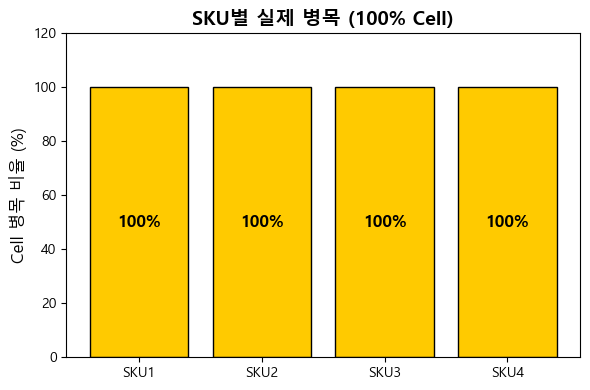

In [19]:
import matplotlib.pyplot as plt

# SKU별 병목을 전부 Cell로 고정
skus = ["SKU1", "SKU2", "SKU3", "SKU4"]
values = [100, 100, 100, 100]  # 모두 100%

fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(skus, values, color="#ffca00", edgecolor="black")

# 퍼센트 라벨
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
            f"{val}%", ha="center", va="center", fontsize=12, fontweight="bold")

ax.set_ylim(0, 120)
ax.set_ylabel("Cell 병목 비율 (%)", fontsize=12)
ax.set_title("SKU별 실제 병목 (100% Cell)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

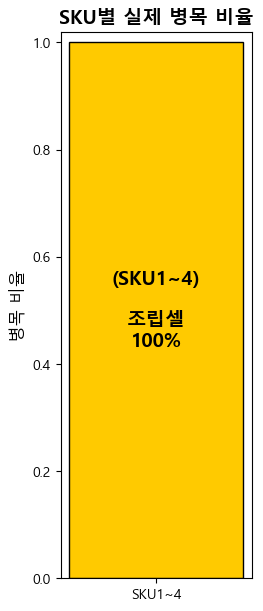

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5,6), constrained_layout=True)
ax.bar("SKU1~4", 1.0, color="#ffca00", edgecolor="black")  # 🔹 값은 1.0 (100%)

# 라벨 (조립셀 100%로 표기)
ax.text(0, 0.5, "(SKU1~4)\n\n조립셀\n100%", ha="center", va="center",
        fontsize=14, fontweight="bold")

# 🔹 축 범위 (0~1.05로 약간 여유)
ax.set_ylim(0, 1.02)

ax.set_ylabel("병목 비율", fontsize=12)
ax.set_title("SKU별 실제 병목 비율", fontsize=14, fontweight="bold")

plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_31772\2886575730.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight="bold")
C:\Users\KDT6\AppData\Local\Temp\ipykernel_31772\2886575730.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()],


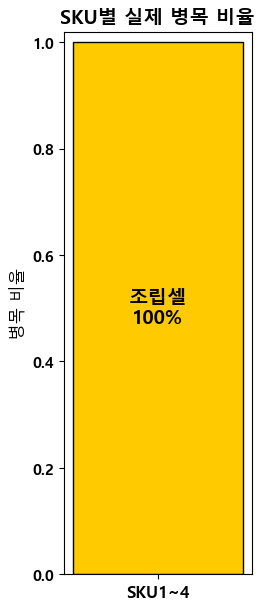

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5,6), constrained_layout=True)
ax.bar("SKU1~4", 1.0, color="#ffca00", edgecolor="black")  # 🔹 값은 1.0 (100%)

# 라벨 (조립셀 100%로 표기)
ax.text(0, 0.5, "조립셀\n100%", ha="center", va="center",
        fontsize=14, fontweight="bold")

# 🔹 축 범위 (0~1.05로 약간 여유)
ax.set_ylim(0, 1.02)

ax.set_ylabel("병목 비율", fontsize=12)
ax.set_title("SKU별 실제 병목 비율", fontsize=14, fontweight="bold")

# ✅ x축 이름 bold
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight="bold")

# ✅ y축 숫자 bold
ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()],
                   fontsize=11, fontweight="bold")

plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_31772\1967601773.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight="bold")
C:\Users\KDT6\AppData\Local\Temp\ipykernel_31772\1967601773.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()],


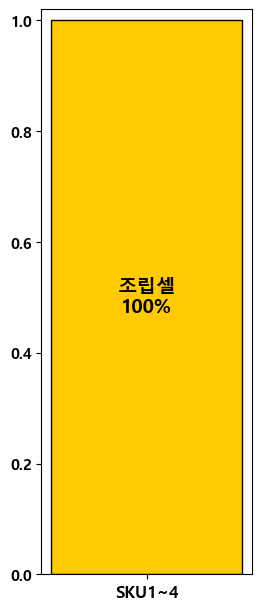

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5,6), constrained_layout=True)
ax.bar("SKU1~4", 1.0, color="#ffca00", edgecolor="black")  # 🔹 값은 1.0 (100%)

# 라벨 (조립셀 100%로 표기)
ax.text(0, 0.5, "조립셀\n100%", ha="center", va="center",
        fontsize=14, fontweight="bold")

# 🔹 축 범위 (0~1.05로 약간 여유)
ax.set_ylim(0, 1.02)

# ✅ x축 이름 bold
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight="bold")

# ✅ y축 숫자 bold
ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()],
                   fontsize=11, fontweight="bold")

# (필요시 라벨/제목 다시 살리기 가능)
# ax.set_ylabel("병목 비율", fontsize=12, fontweight="bold")
# ax.set_title("실제 병목: Cell (SKU1~4 전부)", fontsize=14, fontweight="bold")

plt.show()

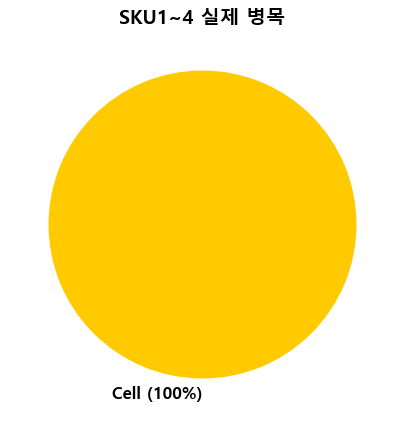

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie([1], labels=["Cell (100%)"], colors=["#ffca00"], startangle=90,
       textprops={"fontsize":12, "weight":"bold"})
ax.set_title("SKU1~4 실제 병목", fontsize=14, fontweight="bold")
plt.show()